In [73]:
from igraph import *

In [223]:
class Grafo:
    # função que define estrutura do grafo
    def __init__(self, V, E):
        self.V = V
        self.E = set(frozenset((u,v)) for u,v in E)
        self._vizinhos = {}
        
        # adiciona vertice para cada V passado como argumento da classe
        for v in V:
            self.adiciona_vertice(v)

        # adiciona todas arestas em E passado como argumento da classe
        for u,v in self.E:
            self.adiciona_aresta(u,v)
    
    # adicona novo vertice
    def adiciona_vertice(self, v):
        # adiciona se ainda não existe vertive no Grafo
        if v not in self._vizinhos:
            self._vizinhos[v] = set()

    # adiciona nova aresta
    def adiciona_aresta(self, u, v):
        # adiciona vertices caso u ou v não exista
        self.adiciona_vertice(u)
        self.adiciona_vertice(v)

        # adiciona o conjunto de arestas em E
        self.E.add(frozenset([u,v]))
        self._vizinhos[u].add(v)
        self._vizinhos[v].add(u)

    # adiciona aresta direcionada
    def adiciona_aresta_direcionada(self, u, v):
        # adiciona vertices caso u ou v não exista
        self.adiciona_vertice(u)
        self.adiciona_vertice(v)

        # adiciona o conjunto de arestas em E
        self.E.add(frozenset([u,v]))
        self._vizinhos[u].add(v)
    
    # apaga aresta
    def apaga_aresta(self, u, v):
        e = frozenset([u,v]) 

        # verifica se existe conjunto de arestas em E
        if e in self.E:
            self.E.remove(e)
            self._vizinhos[u].remove(v)
            self._vizinhos[v].remove(u)
    
    # Apaga vertice e arestas que ele tinha com outros nós
    def apaga_vertice(self, u):
        para_apagar = list(self.vizinhos(u))
        # apaga todas arestas de u
        for v in para_apagar:
            self.apaga_aresta(u,v)
        del self._vizinhos[u]
    
    # verifica se aresta existe no Grafo
    def existe_aresta(self, u, v):
        e = frozenset([u,v])
        # verifica se conjunto existe em E, caso exista ele retorna True, caso contrario retorna falso
        if e in self.E:
            return True
        else:
            return False

    # retorna grau de um vertice
    def deg(self, v):
        return len(self._vizinhos[v])

    # retorna vizinhos de v
    def vizinhos(self, v):
        return iter(self._vizinhos[v])

    # quantidade de arestas no Grafo
    @property
    def m(self):
        return len(self.E)
    
    @property
    def n(self):
        return len(self._vizinhos)    
    
    def BFS_menor_caminho(self, x, y):
        G_aux = Grafo(self.V, {})
        G_menor = Grafo(self.V, {})
        
        nao_visitado = self.V.copy()
        nao_visitado.remove(x)
        
        queue = []
        queue.append(x)
            
        while(queue):
            u = queue.pop(0)

            for v in list(self.vizinhos(u)):
                if(v in nao_visitado):
                    G_aux.adiciona_aresta_direcionada(v,u)
                    nao_visitado.remove(v)
                    queue.append(v)
                if(v == y):
                    self.menor_caminho(G_aux, G_menor, x, y)
                    return G_menor
                    
                    
        return Grafo(self.V, {})
        
    def menor_caminho(self, G_aux, G_menor, x, y):
        if(y != x):
            G_menor.adiciona_aresta_direcionada(list(G_aux.vizinhos(y))[0],y)
            self.menor_caminho(G_aux, G_menor, x, list(G_aux.vizinhos(y))[0])
    
    
    
    def BFS(self, x):
        G_aux1 = Grafo(self.V, {})
        
        nao_visitado = self.V.copy()
        nao_visitado.remove(x)
        
        queue = []
        queue.append(x)
            
        while(queue):
            u = queue.pop(0)

            for v in list(self.vizinhos(u)):
                if(v in nao_visitado):
                    G_aux1.adiciona_aresta_direcionada(u,v)
                    nao_visitado.remove(v)
                    queue.append(v)
        return G_aux1


In [224]:
#inicializando grafo 
G = Grafo([1,2,3,4,5,6,7,8,9,10,11,12,13,14], 
          {(1,2),(2,3),(3,4),(3,5),(4,8),(5,6),(6,7),(7,8),(7,9),(9,11),(11,10),(10,8),(1,10),(12,13),(13,14),(14,12)})
G1 = G.BFS(1)
G2 = G.BFS_menor_caminho(1,12)

In [225]:
g = Graph(directed = False)
g1 = Graph(directed = False)
g2 = Graph(directed = True)

lista = []
lista1 = []
lista2 = []

g.add_vertices(range(G.n))
g1.add_vertices(range(G1.n))
g2.add_vertices(range(G2.n))

for i in range(G.n):
    lista = list(G.vizinhos(i+1))
    for j in lista:
        if ((j-1,i) not in g.get_edgelist()) and ((i,j-1) not in g.get_edgelist()):
            g.add_edges([(i,j-1)])
        
for i in range(G1.n):
    lista1 = list(G1.vizinhos(i+1))
    for j in lista1:
        g1.add_edges([(i,j-1)])

for i in range(G2.n):
    lista2 = list(G2.vizinhos(i+1))
    for j in lista2:
        g2.add_edges([(i,j-1)])
        
for i in range(len(g.vs)):
    g.vs[i]["id"]= i
    g.vs[i]["label"]= str(i+1)
    
for i in range(len(g1.vs)):
    g1.vs[i]["id"]= i
    g1.vs[i]["label"]= str(i+1)    

for i in range(len(g2.vs)):
    g2.vs[i]["id"]= i
    g2.vs[i]["label"]= str(i+1)

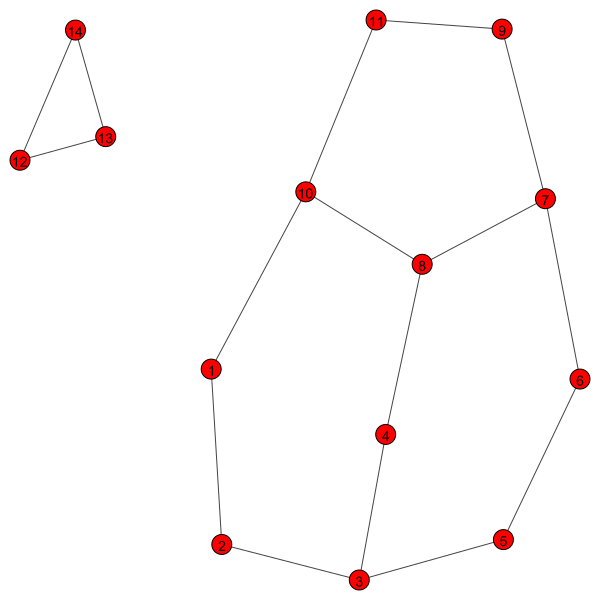

In [226]:
plot(g)

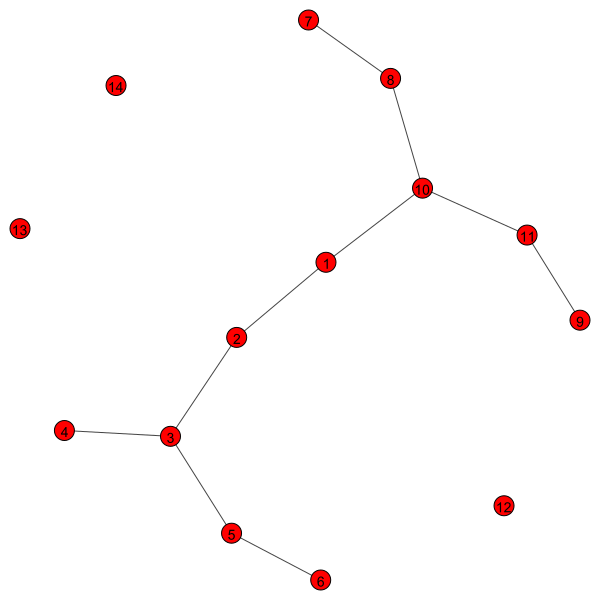

In [227]:
plot(g1)

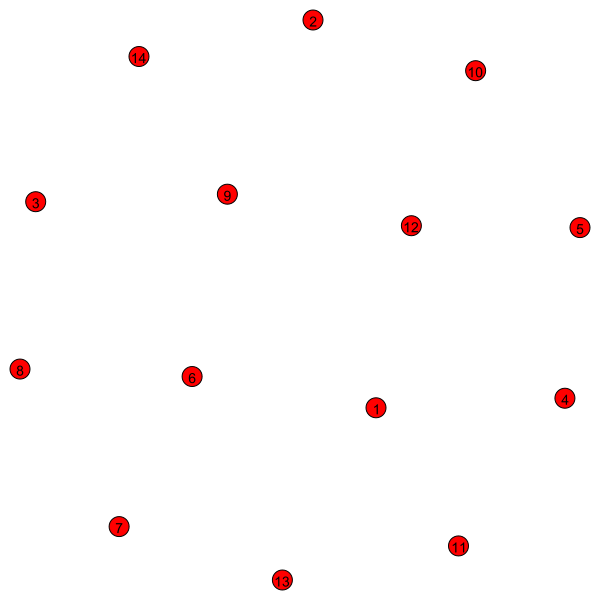

In [228]:
plot(g2)

In [212]:
def func(n):
    if (n <= 1):
        return n
    
    return func(n-1) + func(n-2)

j = func(2)
print(j)

1
